In [2]:
import tarfile
import netCDF4 as nc
from netCDF4 import Dataset
import os
import xarray as xr

# Define the path to the tar.gz file and the extraction directory
tar_gz_path = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\example_output.tar.gz"
extraction_dir = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)"

In [3]:
# Directory containing the NetCDF files
data_surface_dir = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\SURFACEMODEL"
data_routing_dir = r"D:\Dom_Work\A_Work\Work\01_AIT\01_NASA's Land Information System (LIS)\ROUTING"

In [4]:
def find_nc_files(directory, combine):
    # Initialize an empty list to store the .nc file paths
    nc_files = []
    
    # Walk through the directory and find all .nc files
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.nc'):
                nc_files.append(os.path.join(root, file))  
    
    # Ensure that files list is passed to open_mfdataset
    ds = xr.open_mfdataset(nc_files, combine=combine)
    
    # Print the number of files found
    print(f'Found {len(nc_files)} files')
    
    return ds

In [5]:
# download data
ds_surface = find_nc_files(data_surface_dir,combine='by_coords')

Found 15339 files


In [6]:
# download data
ds_routing = find_nc_files(data_routing_dir,combine='by_coords')

Found 5113 files


In [7]:
# Check variables, dimensions, and attributes dataset
def check_variables(data):
    if ds_surface:
        print("Variables in SURFACEMODEL dataset:")
        print(ds_surface)  # Prints a summary of the dataset, including variables and dimensions

        print("\nList of variables in SURFACEMODEL:")
        print(list(ds_surface.data_vars))  # Lists all variables in the dataset

        # Inspect specific details of each variable
        for var in ds_surface.data_vars:
            print(f"\nDetails of variable '{var}':")
            print(ds_surface[var])  # Shows details like dimensions, attributes, etc.
    else:
        print("No SURFACEMODEL dataset loaded.")

check_variables(ds_surface)

Variables in SURFACEMODEL dataset:
<xarray.Dataset> Size: 200MB
Dimensions:          (time: 5113, north_south: 36, east_west: 34,
                      SoilMoist_profiles: 4)
Coordinates:
  * time             (time) datetime64[ns] 41kB 2010-01-02 ... 2024-01-01
Dimensions without coordinates: north_south, east_west, SoilMoist_profiles
Data variables:
    lat              (time, north_south, east_west) float32 25MB dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
    lon              (time, north_south, east_west) float32 25MB dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
    SoilMoist_tavg   (time, SoilMoist_profiles, north_south, east_west) float32 100MB dask.array<chunksize=(1, 4, 36, 34), meta=np.ndarray>
    TWS_tavg         (time, north_south, east_west) float32 25MB dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
    Streamflow_tavg  (time, north_south, east_west) float32 25MB dask.array<chunksize=(1, 36, 34), meta=np.ndarray>
Attributes: (12/15)
    missing_value:     

In [8]:
# Select the variable of interest
# Compute basic statistics for a given xarray.DataArray.
def ds_variable(data, variable):
    ds = ds_surface[variable]  # Replace with  specific variable
    print(f" variable : {variable}")

    var_data = ds.load() # Load the data into memory
    print(f" shape : {var_data.shape}")
    
    ds_mean_value = var_data.mean().values # Compute basic statistics
    ds_min_value = var_data.min().values
    ds_max_value = var_data.max().values
    ds_std_dev = var_data.std().values
    print(f"Mean: {ds_mean_value:.4f} {ds.units}")
    print(f"Min: {ds_min_value:.4f} {ds.units}")
    print(f"Max: {ds_max_value:.4f} {ds.units}")
    print(f"Standard Deviation: {ds_std_dev:.4f} {ds.units}")

    return var_data

soil_moisture = ds_variable(ds_surface, 'SoilMoist_tavg')

 variable : SoilMoist_tavg
 shape : (5113, 4, 36, 34)
Mean: 0.2894 m^3 m-3
Min: 0.0446 m^3 m-3
Max: 0.4646 m^3 m-3
Standard Deviation: 0.0714 m^3 m-3


In [9]:
tws = ds_variable(ds_surface, 'TWS_tavg')

 variable : TWS_tavg
 shape : (5113, 36, 34)
Mean: 5490.4771 mm
Min: 5021.3496 mm
Max: 5924.2964 mm
Standard Deviation: 245.9892 mm


In [10]:
Streamflow = ds_variable(ds_surface, 'Streamflow_tavg')

 variable : Streamflow_tavg
 shape : (5113, 36, 34)
Mean: 120.7459 m3 s-1
Min: -414.8322 m3 s-1
Max: 21396.9824 m3 s-1
Standard Deviation: 646.3803 m3 s-1


In [11]:
Streamflow = ds_variable(ds_routing, 'Streamflow_tavg')

 variable : Streamflow_tavg
 shape : (5113, 36, 34)
Mean: 120.7459 m3 s-1
Min: -414.8322 m3 s-1
Max: 21396.9824 m3 s-1
Standard Deviation: 646.3803 m3 s-1


In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from scipy.stats import linregress
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
def plot_time_series(data, variable, spatial_dims=['north_south', 'east_west']):
    # Check if the variable exists in the dataset
    if variable in data.data_vars:
        # Access the variable and calculate the mean over spatial dimensions
        var_data = data[variable].mean(dim=spatial_dims)
        units = var_data.attrs.get('units', '')  # Retrieve units if available

        # Plot the time series
        plt.figure(figsize=(12, 3))
        var_data.plot()  # Plot the DataArray directly
        plt.title(f'Time Series of {variable}')
        plt.xlabel('Time')
        plt.ylabel(f'{variable} ({units})')
        plt.grid()
        plt.show()
    else:
        print(f"Variable '{variable}' not found in the dataset.")

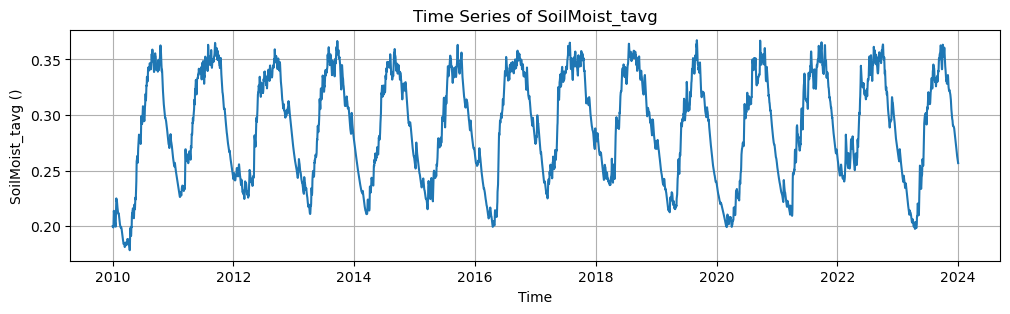

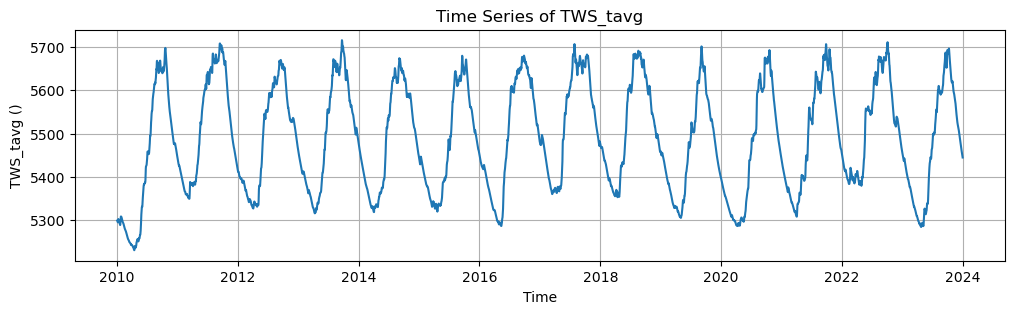

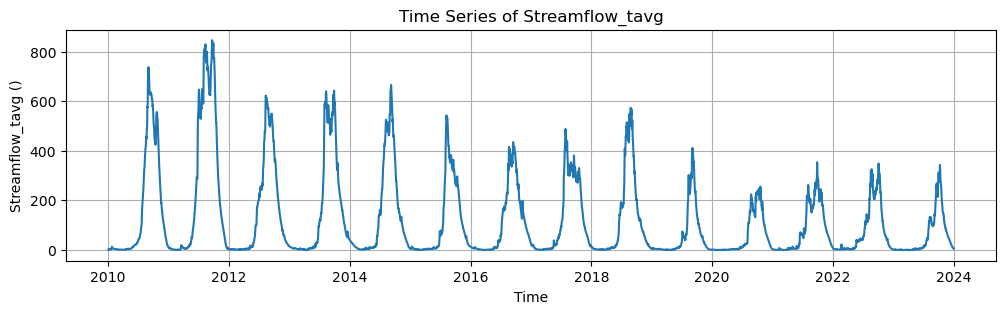

In [14]:
plot_time_series(ds_surface, 'SoilMoist_tavg', spatial_dims=['SoilMoist_profiles', 'north_south', 'east_west'])
plot_time_series(ds_surface, 'TWS_tavg', spatial_dims=['north_south', 'east_west'])
plot_time_series(ds_surface, 'Streamflow_tavg', spatial_dims=['north_south', 'east_west'])

In [15]:
# Check for NaN or missing values
print(ds_surface.isnull().sum())

<xarray.Dataset> Size: 20B
Dimensions:          ()
Data variables:
    lat              int32 4B dask.array<chunksize=(), meta=np.ndarray>
    lon              int32 4B dask.array<chunksize=(), meta=np.ndarray>
    SoilMoist_tavg   int32 4B 0
    TWS_tavg         int32 4B 0
    Streamflow_tavg  int32 4B 976583


In [16]:
# Check for NaN or missing values
# Check for missing values and trigger computation
print(ds_routing.isnull().sum().compute())

<xarray.Dataset> Size: 12B
Dimensions:          ()
Data variables:
    lat              int32 4B 976583
    lon              int32 4B 976583
    Streamflow_tavg  int32 4B 976583


In [17]:
# Validating data
# 1. Check for missing values
def missing_data(data):
    # Replace the dataset's missing value attribute with NaN
    data = data.where(data != data.attrs.get('missing_value', np.nan), np.nan)
    
    # Calculate the percentage of missing data per variable
    missing_data = data.isnull().mean(dim='time')  # Replace sum with mean for percentage
    
    print("Missing data per variable:\n", missing_data)
    
    # 2. Validate data types (float32 for most variables, datetime64 for time)
    for var in data.data_vars:
        if not np.issubdtype(data[var].dtype, np.floating):
            print(f"Data type issue with {var}: Expected float32, but got {data[var].dtype}")
        else:
            print(f"Data type validated for {var}: {data[var].dtype}")
            
    return data

ds_surface = missing_data(ds_surface)

Missing data per variable:
 <xarray.Dataset> Size: 78kB
Dimensions:          (north_south: 36, east_west: 34, SoilMoist_profiles: 4)
Dimensions without coordinates: north_south, east_west, SoilMoist_profiles
Data variables:
    lat              (north_south, east_west) float64 10kB dask.array<chunksize=(36, 34), meta=np.ndarray>
    lon              (north_south, east_west) float64 10kB dask.array<chunksize=(36, 34), meta=np.ndarray>
    SoilMoist_tavg   (SoilMoist_profiles, north_south, east_west) float64 39kB ...
    TWS_tavg         (north_south, east_west) float64 10kB 0.0 0.0 ... 0.0 0.0
    Streamflow_tavg  (north_south, east_west) float64 10kB 1.0 1.0 ... 1.0 1.0
Data type validated for lat: float32
Data type validated for lon: float32
Data type validated for SoilMoist_tavg: float32
Data type validated for TWS_tavg: float32
Data type validated for Streamflow_tavg: float32


In [18]:
def plot_variable_statistics(data, variable, spatial_dims=['north_south', 'east_west']):
    # Check if the variable exists in the dataset
    if variable in data.data_vars:
        # Access the variable data
        var_data = data[variable]

        # Calculate statistics over the specified spatial dimensions
        var_mean = var_data.mean(dim=spatial_dims)
        var_min = var_data.min(dim=spatial_dims)
        var_max = var_data.max(dim=spatial_dims)
        var_std_dev = var_data.std(dim=spatial_dims)
        units = var_data.attrs.get('units', '')  # Retrieve units if available

        # Create the plot
        plt.figure(figsize=(12, 5))
        plt.plot(var_mean, label=f'Average {variable} (TWS)')
        plt.plot(var_min, label=f'Minimum {variable} (TWS)', linestyle='--')
        plt.plot(var_max, label=f'Maximum {variable} (TWS)', linestyle='--')

        # Customize the plot
        plt.title(f'Average, Minimum, and Maximum {variable} Over Time')
        plt.xlabel('Time')
        plt.ylabel(f'{variable} ({units})')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.tight_layout()

        # Show the plot
        plt.show()
    else:
        print(f"Variable '{variable}' not found in the dataset.")

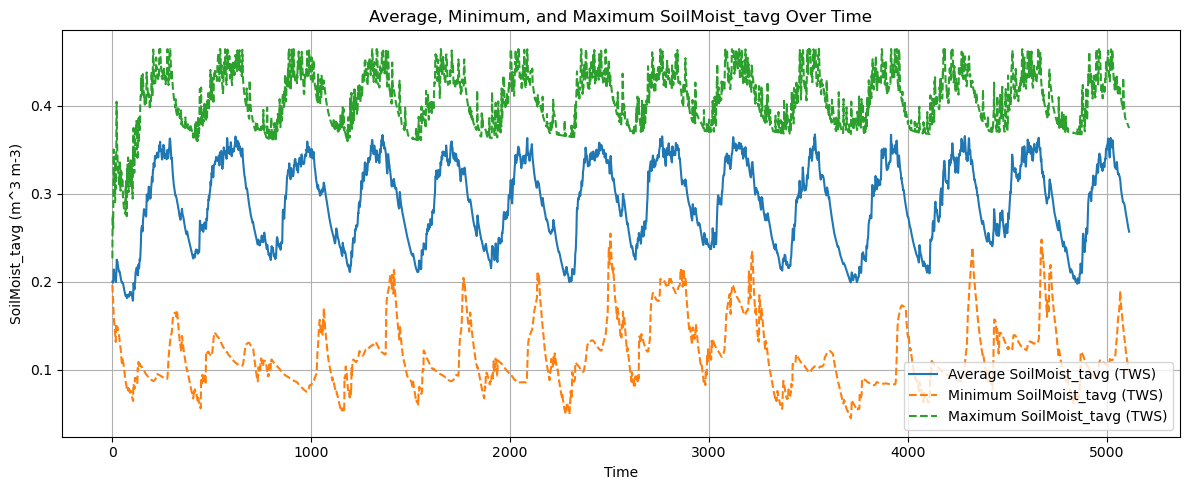

In [19]:
# Example usage:
if ds_surface:
    plot_variable_statistics(ds_surface, 'SoilMoist_tavg', spatial_dims=['SoilMoist_profiles', 'north_south', 'east_west'])

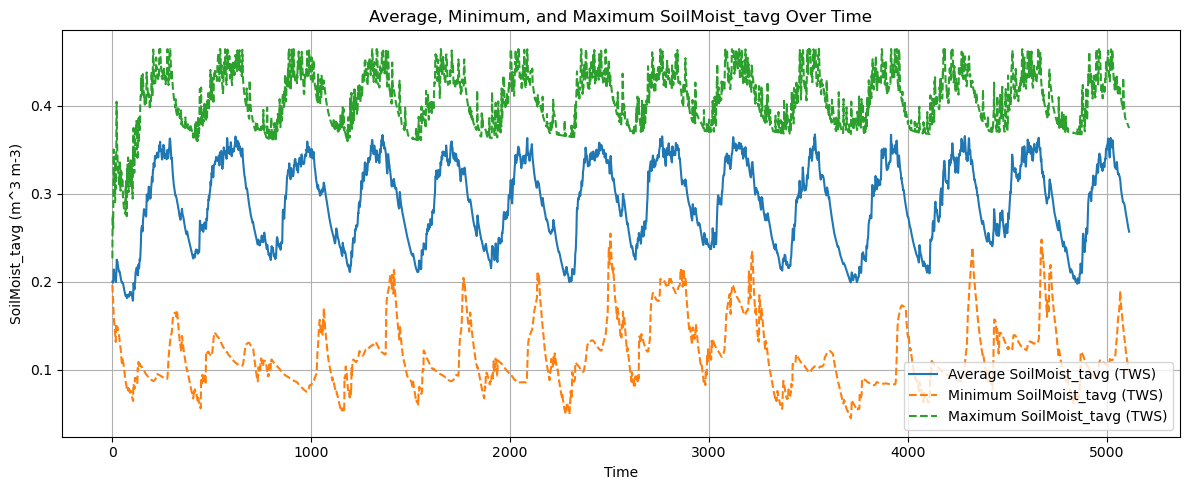

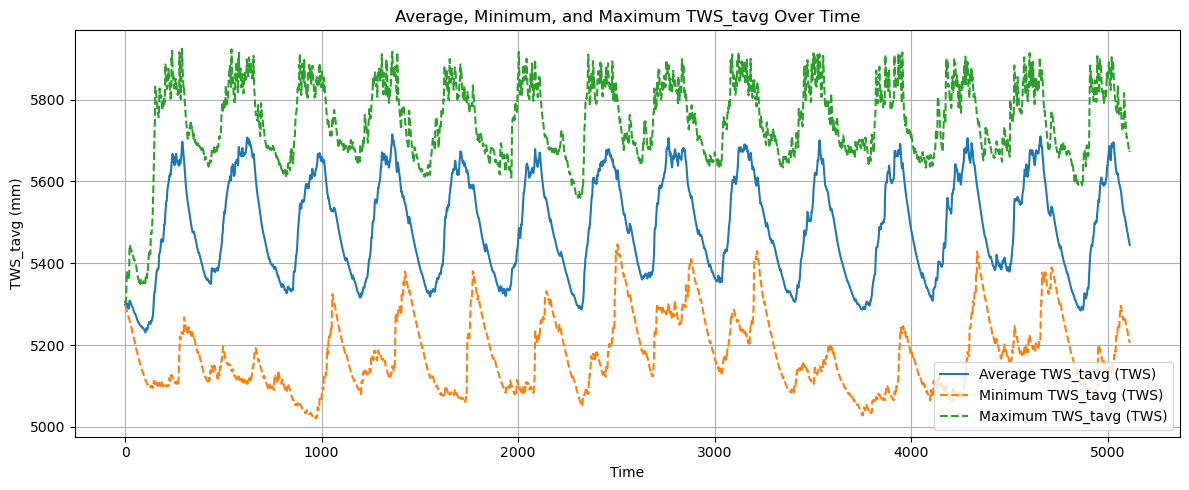

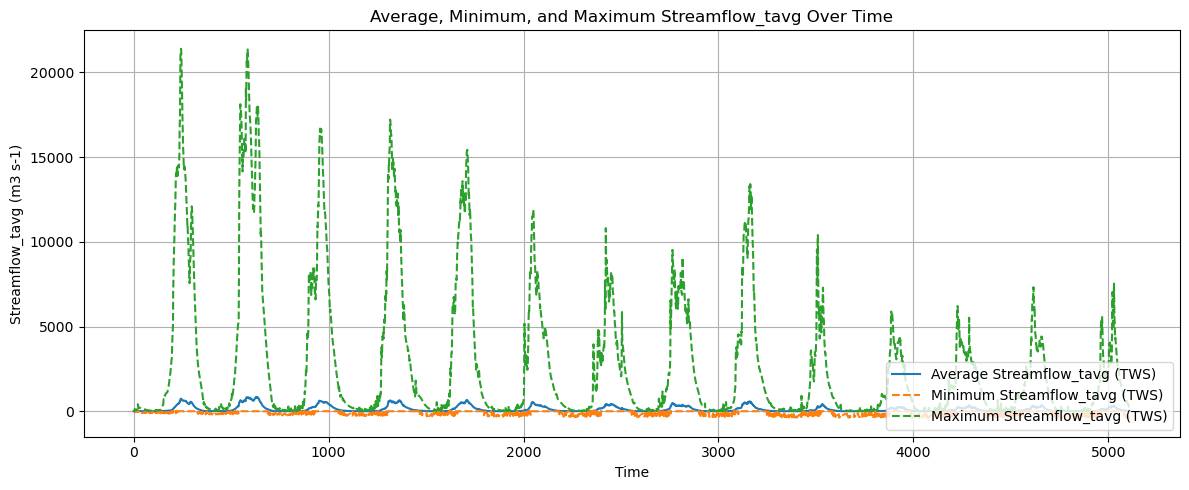

In [20]:
plot_variable_statistics(ds_surface, 'SoilMoist_tavg', spatial_dims=['SoilMoist_profiles', 'north_south', 'east_west'])
plot_variable_statistics(ds_surface, 'TWS_tavg', spatial_dims=['north_south', 'east_west'])
plot_variable_statistics(ds_surface, 'Streamflow_tavg', spatial_dims=['north_south', 'east_west'])

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_and_plot(data, variable, spatial_dims=['north_south', 'east_west'], model='additive', freq=None):
    """
    Decomposes and plots the time series of a specified variable into trend, seasonal, and residual components.

    Args:
        data (xarray.Dataset): The dataset containing the variable.
        variable (str): The name of the variable to decompose and plot.
        spatial_dims (list): List of spatial dimensions to average over (default: ['north_south', 'east_west']).
        model (str): The decomposition model ('additive' or 'multiplicative'). Default is 'additive'.
        freq (int): Frequency of the seasonal decomposition. If None, it's inferred from the data.

    Returns:
        None
    """
    # Check if the variable exists in the dataset
    if variable in data.data_vars:
        # Calculate the mean over the spatial dimensions to get the overall time series
        var_mean = data[variable].mean(dim=spatial_dims).to_pandas()

        # Perform seasonal decomposition
        decomposition = seasonal_decompose(var_mean, model=model, period=freq)

        # Create subplots
        fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

        # Plot the original time series
        axs[0].plot(var_mean.index, var_mean.values, label='Original', color='blue')
        axs[0].set_title('Original Time Series')
        axs[0].legend(loc='lower right')
        axs[0].grid(True)

        # Plot the trend component
        axs[1].plot(decomposition.trend.index, decomposition.trend.values, label='Trend', color='red')
        axs[1].set_title('Trend Component')
        axs[1].legend(loc='lower right')
        axs[1].grid(True)

        # Plot the seasonal component
        axs[2].plot(decomposition.seasonal.index, decomposition.seasonal.values, label='Seasonal', color='green')
        axs[2].set_title('Seasonal Component')
        axs[2].legend(loc='lower right')
        axs[2].grid(True)

        # Plot the residual component
        axs[3].plot(decomposition.resid.index, decomposition.resid.values, label='Residual', color='gray')
        axs[3].set_title('Residual Component')
        axs[3].legend(loc='lower right')
        axs[3].grid(True)

        # Set x-axis label for all subplots
        for ax in axs:
            ax.set_xlabel('Time')

        # Adjust layout and add a main title
        plt.tight_layout()
        plt.suptitle(f'Seasonal Decomposition of {variable} Time Series', fontsize=16, y=1.02)
        plt.show()

    else:
        print(f"Variable '{variable}' not found in the dataset.")

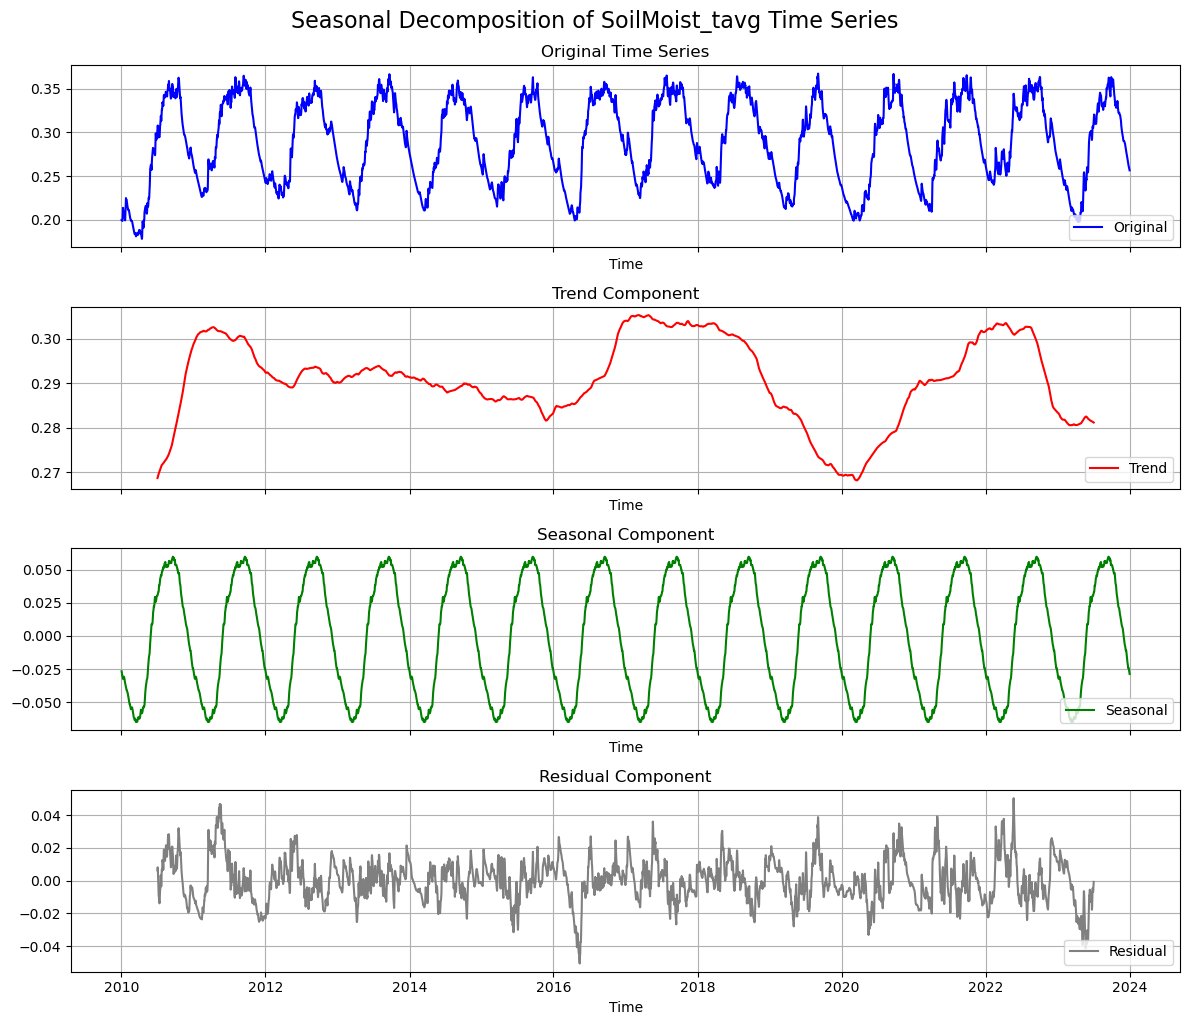

In [22]:
# Example usage:
if ds_surface:
    decompose_and_plot(ds_surface, 'SoilMoist_tavg', 
                       spatial_dims=['SoilMoist_profiles', 'north_south', 'east_west'], model='additive', freq=365)

In [23]:
# Function to decompose and detect anomalies in a variable
def detect_anomalies(dataset, var_name, dim, period=365, threshold_factor=2):
    """
    Decomposes a time series, extracts residuals, and detects high and low anomalies.
    
    Parameters:
    dataset: xarray.Dataset
        The dataset containing the variable.
    var_name: str
        The name of the variable in the dataset.
    period: int
        Period for seasonal decomposition (default: 365).
    threshold_factor: int
        The number of standard deviations from the mean to consider as anomalies (default: 2).
    
    Returns:
    anomalies_high: pandas.Series
        Series of unusually high values in residuals.
    anomalies_low: pandas.Series
        Series of unusually low values in residuals.
    """
    # Extract the time series for the variable
    time_series = dataset[var_name].mean(dim=dim).to_pandas()

    # Ensure the index is in datetime format
    time_series.index = pd.to_datetime(time_series.index)

    # Decompose the time series
    decomposition = seasonal_decompose(time_series, model='additive', period=period)
    
    # Extract the residuals and drop NaN values
    residuals = decomposition.resid.dropna()

    # Calculate the mean and standard deviation of the residuals
    residual_mean = residuals.mean()
    residual_std = residuals.std()

    # Set threshold for anomalies (e.g., 2 standard deviations away from the mean)
    threshold_upper = residual_mean + threshold_factor * residual_std
    threshold_lower = residual_mean - threshold_factor * residual_std

    # Identify anomalies (residuals that are above or below the threshold)
    anomalies_high = residuals[residuals > threshold_upper]
    anomalies_low = residuals[residuals < threshold_lower]

    # Plot the residuals and anomalies
    plt.figure(figsize=(12, 5))
    plt.plot(residuals, label=f'Residuals of {var_name}')
    plt.axhline(threshold_upper, color='r', linestyle='--', label='Upper Threshold')
    plt.axhline(threshold_lower, color='r', linestyle='--', label='Lower Threshold')

    # Mark anomalies
    plt.scatter(anomalies_high.index, anomalies_high, color='red', label='High Anomalies')
    plt.scatter(anomalies_low.index, anomalies_low, color='blue', label='Low Anomalies')

    plt.legend(loc='lower right')
    plt.title(f'Residuals with Anomalies for {var_name}')
    plt.show()

    return anomalies_high, anomalies_low

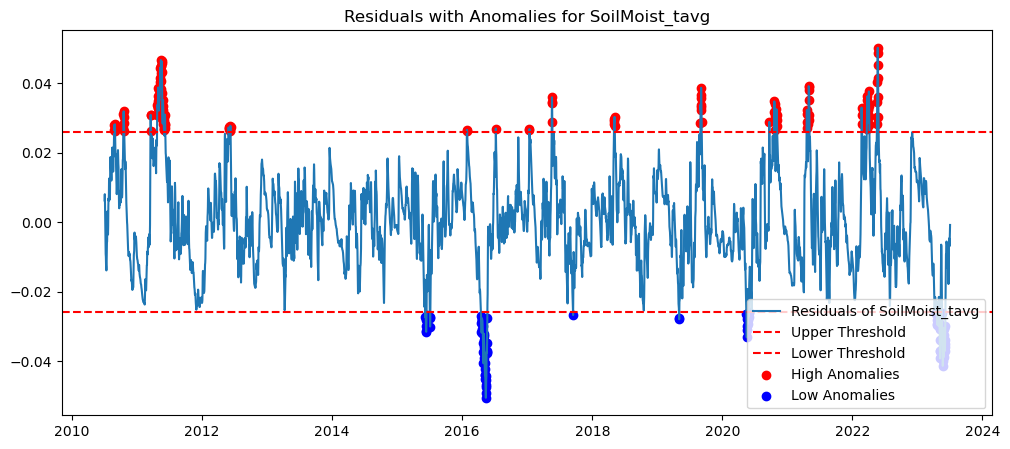

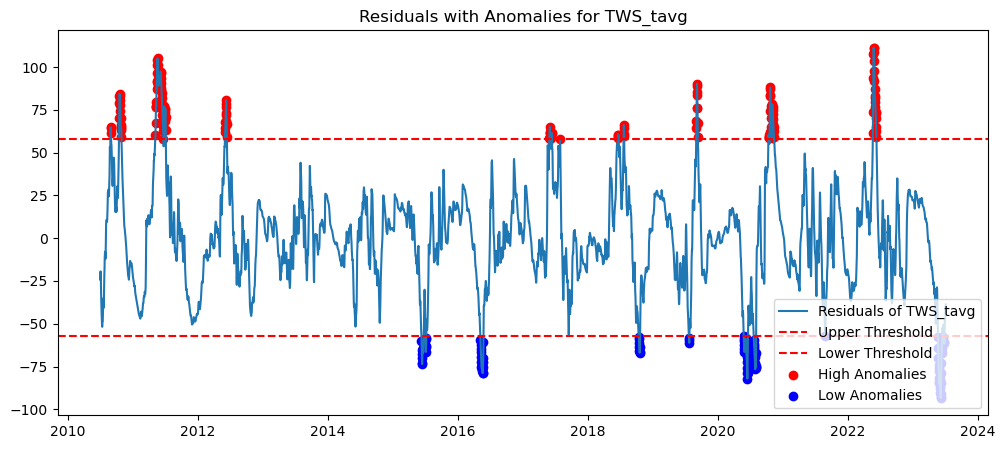

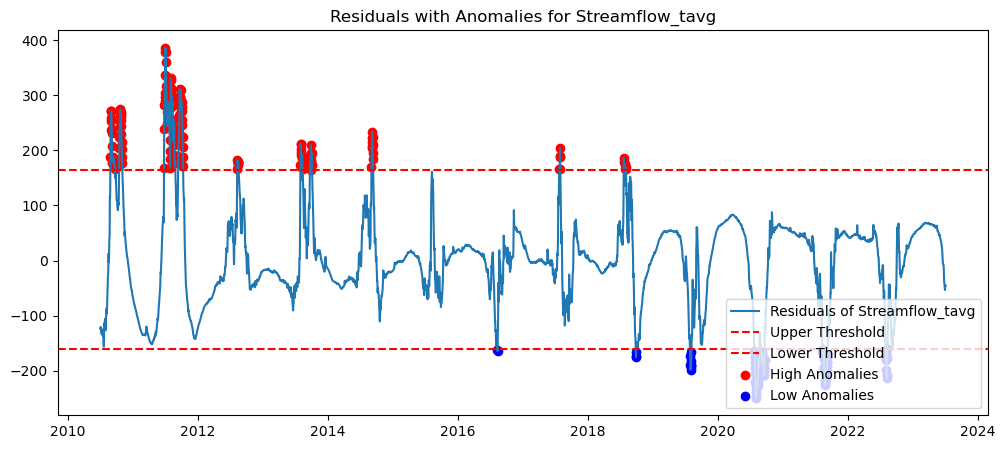

In [24]:
sm_anomalies_high, sm_anomalies_low = detect_anomalies(ds_surface, 'SoilMoist_tavg', dim = ['SoilMoist_profiles', 'north_south', 'east_west'])
tws_anomalies_high, tws_anomalies_low = detect_anomalies(ds_surface, 'TWS_tavg', dim = ['north_south', 'east_west'])
stream_anomalies_high, stream_anomalies_low = detect_anomalies(ds_surface, 'Streamflow_tavg', dim = ['north_south', 'east_west'])

In [25]:
def identify_outliers(dataset, var_name, spatial_dims):
    """
    Identifies and understands outliers in a time series based on basic statistics and IQR.
    
    """
    # Extract the time series and reduce along the spatial dimensions
    time_series = dataset[var_name].mean(dim=spatial_dims).to_pandas()

    # Calculate basic statistics
    mean_value = time_series.mean()
    median_value = time_series.median()
    std_dev = time_series.std()

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = time_series.quantile(0.25)
    Q3 = time_series.quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Set thresholds for outliers (1.5 * IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = time_series[(time_series < lower_bound) | (time_series > upper_bound)]
    
    # Print basic statistics
    print(f"--- {var_name} ---")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {len(outliers)}\n")

    # Visualize the distribution with a box plot
    plt.figure(figsize=(10, 5))
    plt.boxplot(time_series, vert=False)
    plt.title(f'Box Plot of {var_name} (Outliers Highlighted)')
    plt.show()

    return outliers

--- SoilMoist_tavg ---
Mean: 0.2894468307495117
Median: 0.29429754614830017
Standard Deviation: 0.047809042036533356
Q1 (25th percentile): 0.2476443648338318
Q3 (75th percentile): 0.3354400098323822
IQR: 0.08779564499855042
Lower Bound: 0.11595089733600616
Upper Bound: 0.4671334773302078
Number of Outliers: 0



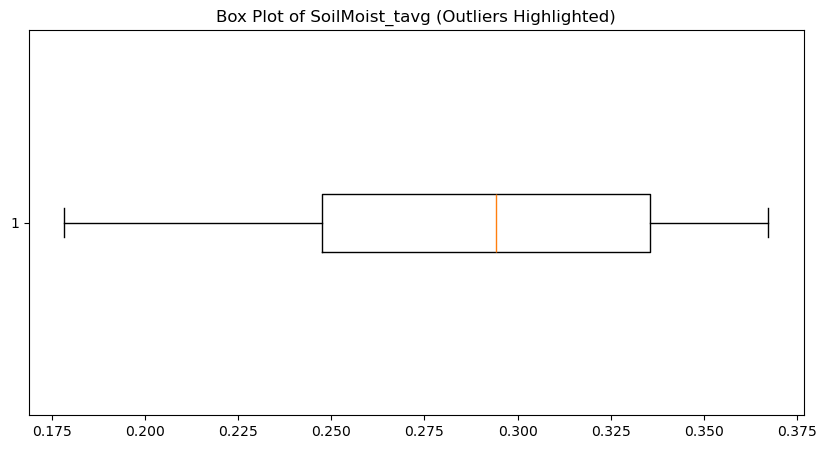

--- TWS_tavg ---
Mean: 5490.47705078125
Median: 5487.19384765625
Standard Deviation: 124.65361785888672
Q1 (25th percentile): 5381.646484375
Q3 (75th percentile): 5607.58837890625
IQR: 225.94189453125
Lower Bound: 5042.733642578125
Upper Bound: 5946.501220703125
Number of Outliers: 0



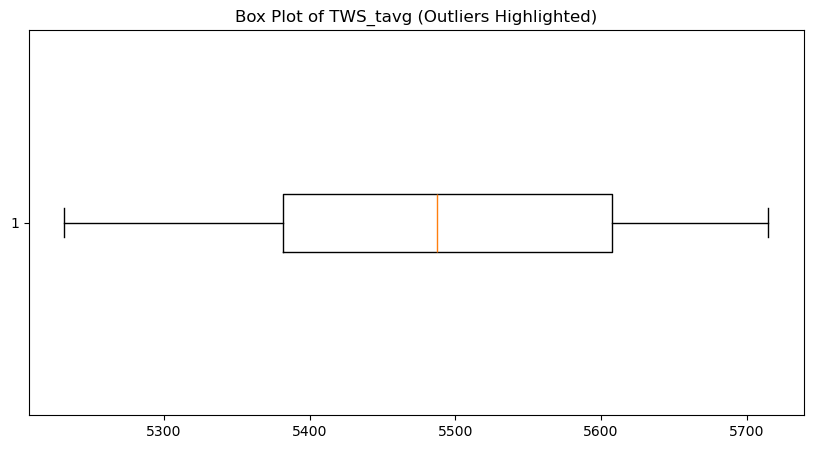

--- Streamflow_tavg ---
Mean: 120.74588012695312
Median: 25.651958465576172
Standard Deviation: 176.32357788085938
Q1 (25th percentile): 2.9283764362335205
Q3 (75th percentile): 184.1800537109375
IQR: 181.25167727470398
Lower Bound: -268.94913947582245
Upper Bound: 456.05756962299347
Number of Outliers: 407



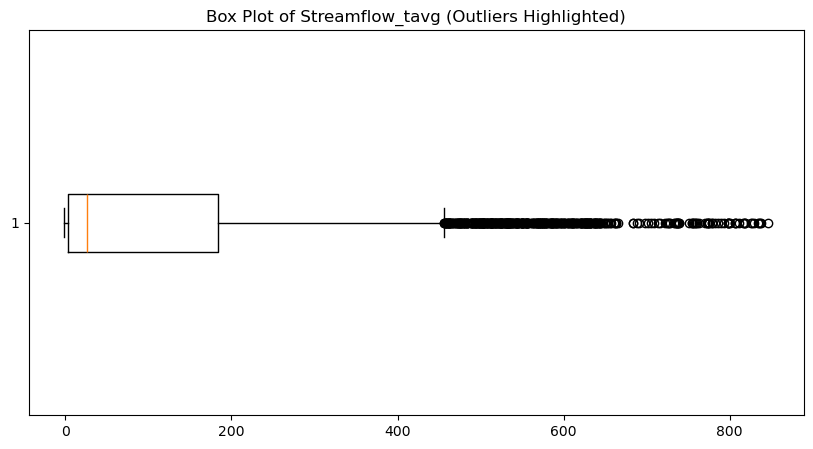

In [26]:
# Example usage for the three variables:

# For Soil Moisture
outliers_soil_moist = identify_outliers(ds_surface, 'SoilMoist_tavg', spatial_dims=['SoilMoist_profiles', 'north_south', 'east_west'])

# For Terrestrial Water Storage (TWS)
outliers_tws = identify_outliers(ds_surface, 'TWS_tavg', spatial_dims=['north_south', 'east_west'])

# For Streamflow
outliers_streamflow = identify_outliers(ds_surface, 'Streamflow_tavg', spatial_dims=['north_south', 'east_west'])


In [47]:
def detect_outliers_and_plot(dataset, var_name, spatial_dims, threshold_factor=2):
    """
    Detects outliers in a specified variable and plots the number of high outliers over time.
    """
    # Extract the DataArray
    data = dataset[var_name].values
    
    # Check the shape of the original data
    print(f"Original {var_name} data shape:", data.shape)

    # Flatten the spatial dimensions
    data_flat = data.reshape(data.shape[0], -1)  # Shape: (time, spatial dimensions)
    print(f"Flattened {var_name} data shape:", data_flat.shape)

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.nanpercentile(data_flat, 25, axis=1)
    Q3 = np.nanpercentile(data_flat, 75, axis=1)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Calculate the upper and lower bounds for each time step
    upper_bound = Q3 + threshold_factor * IQR
    lower_bound = Q1 - threshold_factor * IQR
    
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    
    # Identify high outliers for each time step and count them
    low_outliers_count = [np.sum(data_flat[i] < lower_bound[i]) for i in range(data_flat.shape[0])]
    high_outliers_count = [np.sum(data_flat[i] > upper_bound[i]) for i in range(data_flat.shape[0])]
    
    print(f"Low Outliers: {low_outliers_count[:10]}")  # Display first 10 low outliers
    print(f"High Outliers: {high_outliers_count[:10]}")
    # Extract the time coordinate
    time = dataset[var_name].coords['time'].values

    # Plot the number of high outliers over time
    plt.figure(figsize=(10, 5))
    plt.plot(time, low_outliers_count, label=f'Number of Low Outliers in {var_name}', color='blue')
    plt.plot(time, high_outliers_count, label=f'Number of High Outliers in {var_name}', color='red')
    plt.title(f'Number of Outliers in {var_name} Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Outliers')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

Original Streamflow_tavg data shape: (5113, 36, 34)
Flattened Streamflow_tavg data shape: (5113, 1224)
Lower Bound: [ 0.          0.          0.         ... -0.97403127 -0.60315835
 -0.35702482]
Upper Bound: [0.         0.         0.         ... 1.4610469  0.90473753 0.53553723]
Low Outliers: [2, 2, 2, 3, 3, 1, 10, 4, 11, 11]
High Outliers: [28, 82, 76, 108, 107, 133, 89, 109, 142, 154]


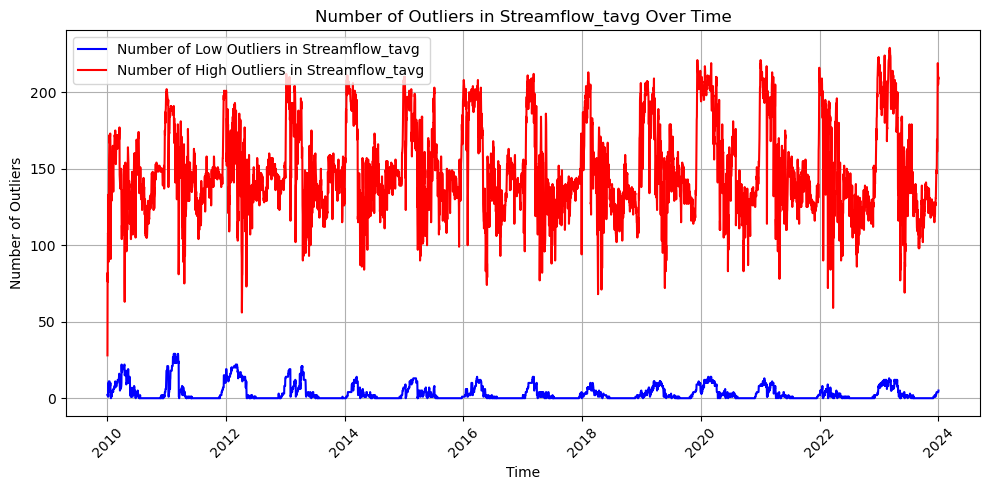

Original SoilMoist_tavg data shape: (5113, 4, 36, 34)
Flattened SoilMoist_tavg data shape: (5113, 4896)
Lower Bound: [0.19886879 0.1969707  0.19484371 ... 0.05043678 0.04876342 0.0473637 ]
Upper Bound: [0.20070314 0.20194295 0.20336289 ... 0.47831891 0.47780149 0.47715314]
Low Outliers: [695, 716, 732, 669, 592, 457, 189, 0, 0, 16]
High Outliers: [361, 354, 352, 353, 372, 678, 901, 491, 327, 305]


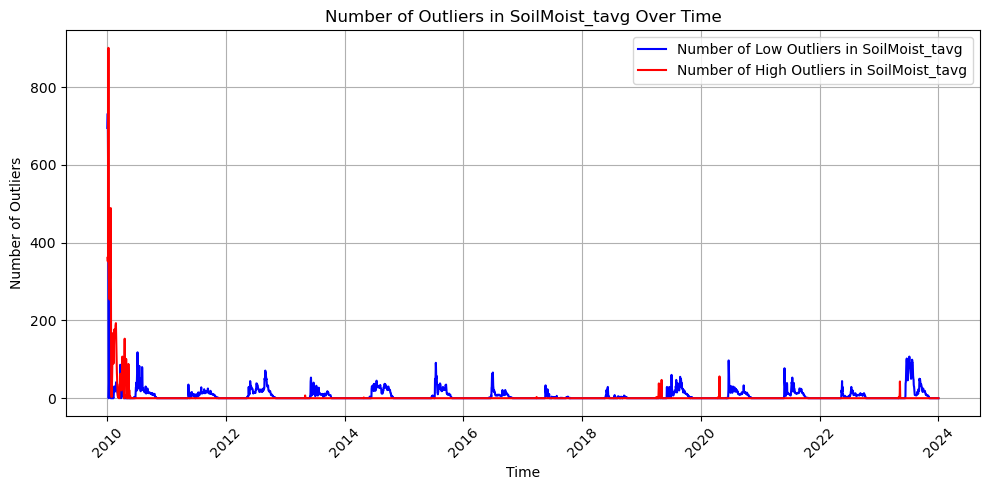

In [49]:
# Example usage
detect_outliers_and_plot(ds_surface, 'Streamflow_tavg', spatial_dims=['north_south', 'east_west'])
detect_outliers_and_plot(ds_surface, 'SoilMoist_tavg', spatial_dims=['SoilMoist_profiles', 'north_south', 'east_west'])

In [51]:
# Filling NaNs with the mean of non-NaN values across the spatial dimensions
stream_mean_value = np.nanmean(ds_surface['Streamflow_tavg'])  # Calculate mean while ignoring NaNs
data_filled = np.where(np.isnan(ds_surface['Streamflow_tavg']), stream_mean_value, ds_surface['Streamflow_tavg'])  # Fill NaNs with mean value

# Convert back to xarray if needed
ds_surface['Streamflow_tavg_filled'] = (('time', 'north_south', 'east_west'), data_filled)

Original Streamflow_tavg_filled data shape: (5113, 36, 34)
Flattened Streamflow_tavg_filled data shape: (5113, 1224)
Lower Bound: [  0.           0.           0.         ... -18.84817982 -14.81215119
 -12.73952579]
Upper Bound: [ 0.          0.          0.         ... 28.27226973 22.21822679
 19.10928869]
Low Outliers: [2, 2, 2, 3, 3, 0, 4, 0, 5, 7]
High Outliers: [219, 273, 267, 299, 298, 219, 222, 209, 221, 232]


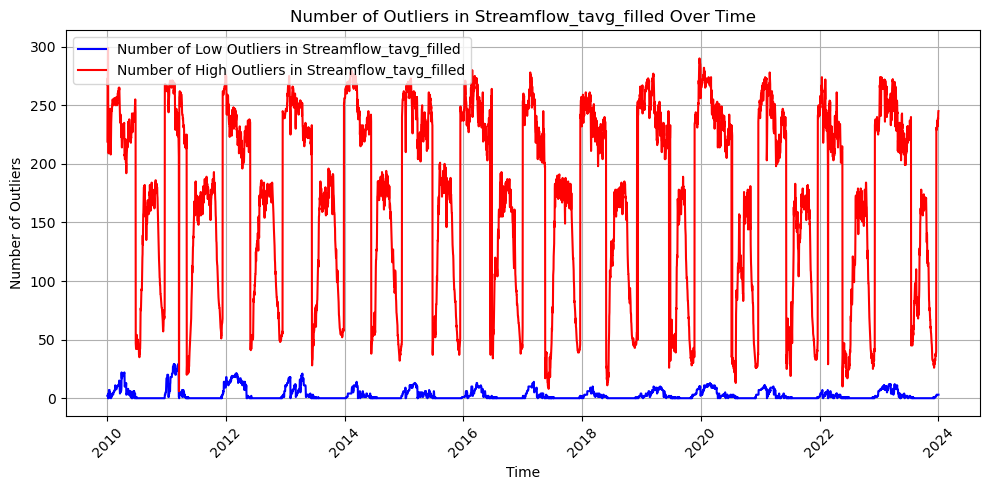

In [53]:
detect_outliers_and_plot(ds_surface, 'Streamflow_tavg_filled', spatial_dims=['north_south', 'east_west'])

In [55]:
# Check for NaN values in the Streamflow data
num_nans = np.isnan(ds_surface['Streamflow_tavg']).sum()
print(f"Number of NaN values in Streamflow_tavg: {num_nans}")
numfilled_nans = np.isnan(ds_surface['Streamflow_tavg_filled']).sum()
print(f"Number of NaN values in Streamflow_tavg_filled: {numfilled_nans}")

Number of NaN values in Streamflow_tavg: <xarray.DataArray 'Streamflow_tavg' ()> Size: 4B
array(976583)
Number of NaN values in Streamflow_tavg_filled: <xarray.DataArray 'Streamflow_tavg_filled' ()> Size: 4B
array(0)


In [57]:
print(ds_surface.dims)
print(ds_surface.coords)

FrozenMappingWarningOnValuesAccess({'time': 5113, 'north_south': 36, 'east_west': 34, 'SoilMoist_profiles': 4})
Coordinates:
  * time     (time) datetime64[ns] 41kB 2010-01-02 2010-01-03 ... 2024-01-01


In [59]:
# Generalized function to compute the linear trend for any variable
def compute_trend(ds, var_name, ns_dim='north_south', ew_dim='east_west', time_dim='time', profile_dim=None):
    da = ds[var_name]
    time_in_years = pd.to_datetime(da[time_dim].values).year

    if profile_dim and profile_dim in da.dims:
        # Average over profiles if the profile dimension exists
        da = da.mean(dim=profile_dim)

    # Initialize an array to store the slope (trend) for the spatial dimensions
    trend = xr.zeros_like(da.isel({time_dim: 0}))

    # Apply linear regression at each grid point
    for ns in range(da.sizes[ns_dim]):
        for ew in range(da.sizes[ew_dim]):
            y = da.isel({ns_dim: ns, ew_dim: ew}).values

            # Perform linear regression
            slope, _, _, p_value, _ = linregress(time_in_years, y)

            # Store the slope if statistically significant
            if p_value < 0.05:
                trend[ns, ew] = slope

    return trend

In [61]:
def plotsub_trend(trend_data_dict):

    n_vars = len(trend_data_dict)
    
    # Create a figure with subplots for each variable
    fig, axes = plt.subplots(1, n_vars, figsize=(5 * n_vars, 4))

    # If there's only one variable, convert axes to a list
    if n_vars == 1:
        axes = [axes]
    
    for ax, (var_name, trend) in zip(axes, trend_data_dict.items()):
        trend_array = trend.values
        
        # Ensure the trend array is two-dimensional
        assert trend_array.ndim == 2, f"Expected 2D array but got {trend_array.ndim}D array."
        
        # Use imshow to plot the trend
        im = ax.imshow(trend_array, cmap='RdBu', aspect='auto', origin='lower')

        # Add a colorbar
        plt.colorbar(im, ax=ax, label='Trend (mm/year)')
        
        # Title and labels
        ax.set_title(f'Long-term {var_name} Trend (mm/year)')
        ax.set_xlabel('East-West Index')
        ax.set_ylabel('North-South Index')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

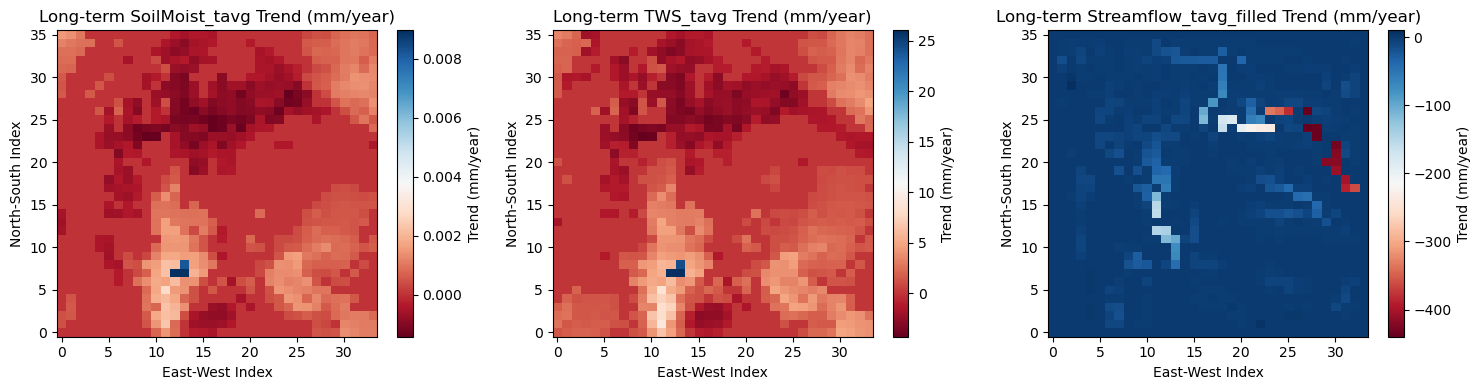

In [63]:
# Main code block to compute and plot trends
variables = ['SoilMoist_tavg', 'TWS_tavg', 'Streamflow_tavg_filled']
trend_data_dict = {}

for var in variables:
    profile_dim = 'SoilMoist_profiles' if var == 'SoilMoist_tavg' else None  # Handle profile dimension
    trend = compute_trend(ds_surface, var, profile_dim=profile_dim)
    trend_data_dict[var] = trend  # Store the trend data in the dictionary

# Call the function to plot subplots for all variables
plotsub_trend(trend_data_dict)

In [65]:
print(trend.isnull().sum())

<xarray.DataArray 'Streamflow_tavg_filled' ()> Size: 4B
array(0)
Coordinates:
    time     datetime64[ns] 8B 2010-01-02


In [67]:
# Add latitude and longitude values
latitude = ds_surface['lon'].values  
longitude = ds_surface['lat'].values  

In [68]:
latitude_2D = ds_surface['lat'].values[0, :, :]  # Shape: (north_south, east_west)
longitude_2D = ds_surface['lon'].values[0, :, :]  # Shape: (north_south, east_west)

In [69]:
def plot_trend_subplots(trend_data_dict, longitude_2D, latitude_2D, cmap='RdBu', projection=ccrs.PlateCarree(), 
                        feature_color='red', figsize=(15, 5)):
    """
    Create subplots of trend maps for multiple variables using Cartopy.
    
    Parameters:
    - trend_data_dict: Dictionary of trend data {var_name: trend_data} for each variable
    """
    n_vars = len(trend_data_dict)
    
    # Create a figure with subplots for each variable
    fig, axes = plt.subplots(1, n_vars, figsize=figsize, subplot_kw={'projection': projection})
    
    # If there's only one variable, convert axes to a list
    if n_vars == 1:
        axes = [axes]
    
    for ax, (var_name, trend) in zip(axes, trend_data_dict.items()):
        # Plot the trend data using imshow
        im = ax.imshow(trend, cmap=cmap, origin='upper', 
                       extent=(longitude_2D.min(), longitude_2D.max(), latitude_2D.min(), latitude_2D.max()), 
                       transform=ccrs.PlateCarree())
        
        # Set title and labels
        ax.set_title(f'{var_name} Trend')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        
        # Add Cartopy features (coastlines and borders)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=2, edgecolor=feature_color)
        
        # Add a colorbar for each subplot
        plt.colorbar(im, ax=ax, orientation='vertical', label=f'{var_name} Trend (mm/year)')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

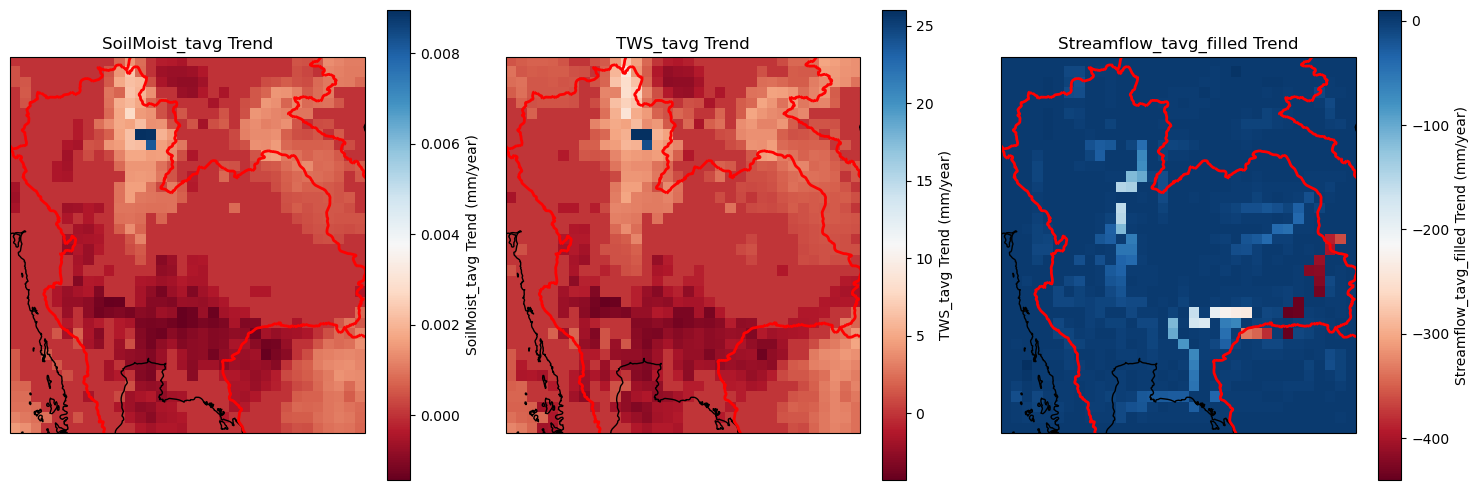

In [70]:
# Plot Soil Moisture Trend
trend_soil_moisture = compute_trend(ds_surface, 'SoilMoist_tavg', ns_dim='north_south', ew_dim='east_west', 
                                    time_dim='time', profile_dim='SoilMoist_profiles')
# Plot TWS Trend
trend_tws = compute_trend(ds_surface, 'TWS_tavg', ns_dim='north_south', ew_dim='east_west', time_dim='time', profile_dim=None)
# Plot TWS Trend
trend_streamflow = compute_trend(ds_surface, 'Streamflow_tavg', ns_dim='north_south', ew_dim='east_west', time_dim='time', profile_dim=None)

# Create a dictionary of trend data with variable names as keys
trend_data_dict = {
    'SoilMoist_tavg': trend_soil_moisture,
    'TWS_tavg': trend_tws,
    'Streamflow_tavg_filled': trend_streamflow
}

# Call the function to plot subplots for all variables
plot_trend_subplots(trend_data_dict, longitude_2D, latitude_2D, cmap='RdBu')

In [71]:
print(trend_soil_moisture.min().values)
print(trend_soil_moisture.mean().values)
print(trend_soil_moisture.max().values)
print(trend_soil_moisture.shape)

-0.001429295283742249
0.00013833224
0.008961644023656845
(36, 34)


In [72]:
def check_min_max_trend(data, variable):
    # Extract the variable's trend data
    trend_var = data[variable].values  # Shape: (north_south, east_west)

    # Find the indices of the maximum and minimum trends
    max_trend_indices = np.unravel_index(np.nanargmax(trend_var), trend_var.shape)
    min_trend_indices = np.unravel_index(np.nanargmin(trend_var), trend_var.shape)

    print(f"Location with highest positive trend (increasing {variable}): {max_trend_indices}, Trend: {trend_var[max_trend_indices]:.6f} mm/year")
    print(f"Location with highest negative trend (decreasing {variable}): {min_trend_indices}, Trend: {trend_var[min_trend_indices]:.6f} mm/year")

    # Corresponding latitude and longitude
    max_trend_lat, max_trend_lon = latitude_2D[max_trend_indices], longitude_2D[max_trend_indices]
    min_trend_lat, min_trend_lon = latitude_2D[min_trend_indices], longitude_2D[min_trend_indices]

    print(f"Coordinates of max positive trend: (Lat: {max_trend_lat}, Lon: {max_trend_lon})")
    print(f"Coordinates of max negative trend: (Lat: {min_trend_lat}, Lon: {min_trend_lon})")

In [73]:
check_min_max_trend(trend_data_dict, 'SoilMoist_tavg')
check_min_max_trend(trend_data_dict, 'TWS_tavg')
check_min_max_trend(trend_data_dict, 'Streamflow_tavg_filled')

Location with highest positive trend (increasing SoilMoist_tavg): (7, 12), Trend: 0.008962 mm/year
Location with highest negative trend (decreasing SoilMoist_tavg): (23, 9), Trend: -0.001429 mm/year
Coordinates of max positive trend: (Lat: 13.625, Lon: 100.375)
Coordinates of max negative trend: (Lat: 17.625, Lon: 99.625)
Location with highest positive trend (increasing TWS_tavg): (7, 12), Trend: 26.012274 mm/year
Location with highest negative trend (decreasing TWS_tavg): (23, 9), Trend: -4.322213 mm/year
Coordinates of max positive trend: (Lat: 13.625, Lon: 100.375)
Coordinates of max negative trend: (Lat: 17.625, Lon: 99.625)
Location with highest positive trend (increasing Streamflow_tavg_filled): (29, 2), Trend: 10.206575 mm/year
Location with highest negative trend (decreasing Streamflow_tavg_filled): (26, 27), Trend: -439.971405 mm/year
Coordinates of max positive trend: (Lat: 19.125, Lon: 97.875)
Coordinates of max negative trend: (Lat: 18.375, Lon: 104.125)


In [74]:
def temporal_trend(data, variable, has_profiles=False):
    var = data[variable]  # Select the variable from the dataset
    
    if has_profiles:
        trends = np.zeros((var.shape[1], var.shape[2], var.shape[3]))  # for SoilMoist_tavg (profiles, north_south, east_west)
    else:
        trends = np.zeros((var.shape[1], var.shape[2]))  # for TWS_tavg, Streamflow_tavg
    
    # Loop through each grid point and calculate the temporal trend
    if has_profiles:
        for p in range(var.shape[1]):  # Loop over profiles for SoilMoist_tavg
            for i in range(var.shape[2]):  # Loop over north_south
                for j in range(var.shape[3]):  # Loop over east_west
                    # Extract time series for the current grid point and profile
                    ts = var[:, p, i, j].values
                    
                    if np.any(np.isnan(ts)):
                        trends[p, i, j] = np.nan
                    else:
                        time = np.arange(len(ts))
                        slope, _, _, _, _ = linregress(time, ts)
                        trends[p, i, j] = slope
    else:
        for i in range(var.shape[1]):  # Loop over north_south
            for j in range(var.shape[2]):  # Loop over east_west
                ts = var[:, i, j].values
                if np.any(np.isnan(ts)):
                    trends[i, j] = np.nan
                else:
                    time = np.arange(len(ts))
                    slope, _, _, _, _ = linregress(time, ts)
                    trends[i, j] = slope
    
    # Plot the trend map for the first profile or for the whole grid (non-profile variables)
    plt.figure(figsize=(8, 6))
    if has_profiles:
        plt.contourf(longitude_2D, latitude_2D, trends[0, :, :], cmap='RdBu', levels=100)  # Plot first profile for SoilMoist_tavg
        plt.title(f'Long-term Trend of {variable} (Profile 1)')
    else:
        plt.contourf(longitude_2D, latitude_2D, trends, cmap='RdBu', levels=100)  # Plot for TWS_tavg or Streamflow_tavg
        plt.title(f'Long-term Trend of {variable}')
    
    plt.colorbar(label='Trend (mm/year)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

    return trends

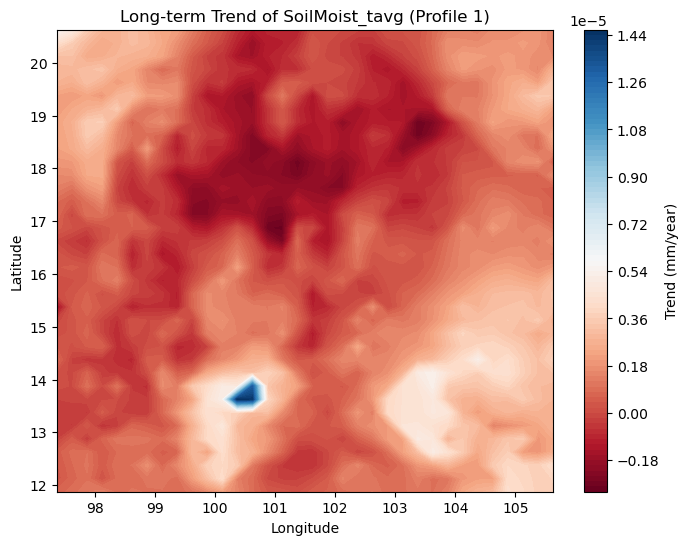

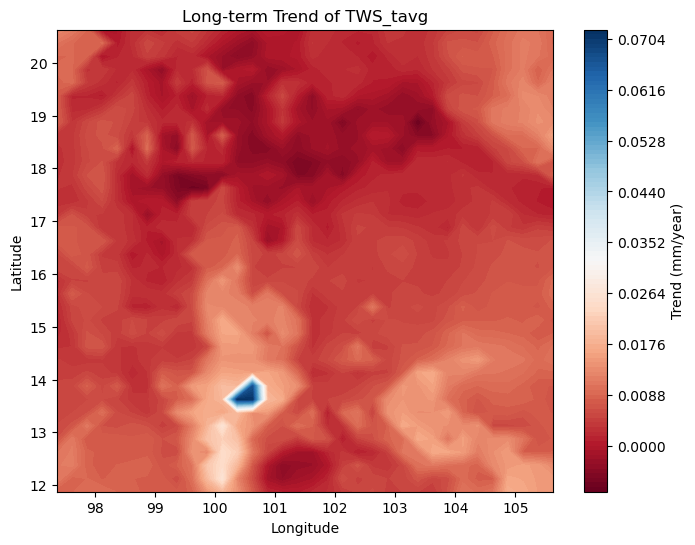

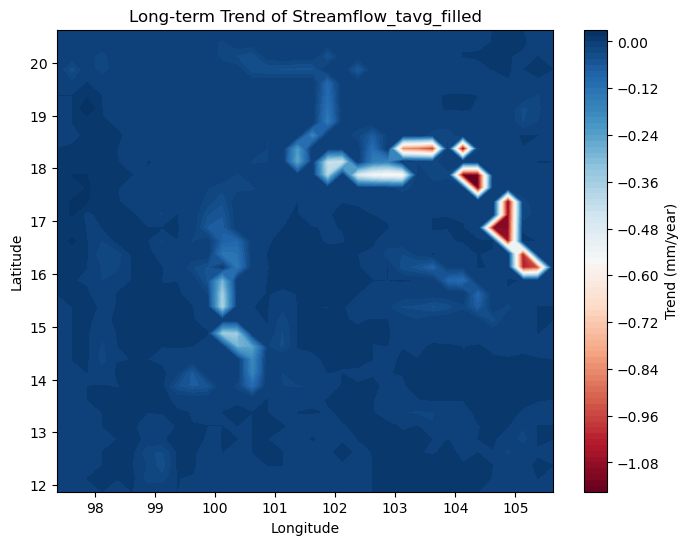

In [75]:
# Compute trends for Soil Moisture (with profiles), TWS, and Streamflow
trends_soil_moisture = temporal_trend(ds_surface, 'SoilMoist_tavg', has_profiles=True)
trends_tws = temporal_trend(ds_surface, 'TWS_tavg')
trends_streamflow = temporal_trend(ds_surface, 'Streamflow_tavg_filled')

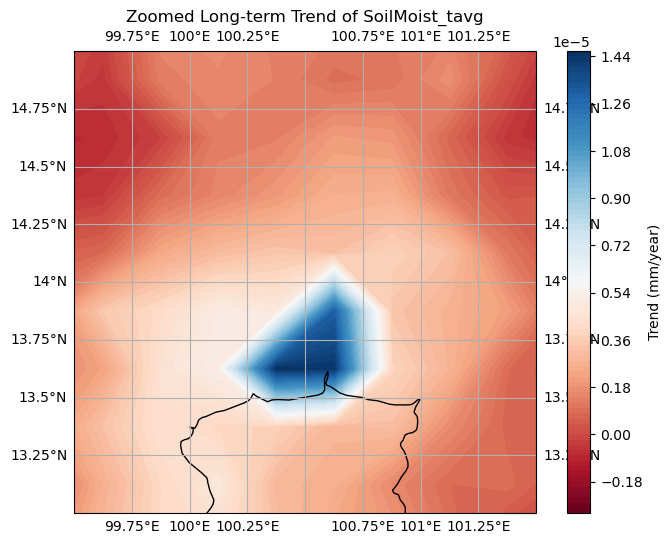

In [76]:
def plot_zoomed_trend_map(trends, latitude_2D, longitude_2D, zoom_extent, variable, has_profiles=False):
    plt.figure(figsize=(8, 6))

    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Create the contour plot
    if has_profiles:
        trend_to_plot = trends[0, :, :]  # Plot first profile for SoilMoist_tavg
    else:
        trend_to_plot = trends  # For TWS_tavg or Streamflow_tavg

    contour = ax.contourf(longitude_2D, latitude_2D, trend_to_plot, cmap='RdBu', levels=100, transform=ccrs.PlateCarree())

    # Zoom into the specified extent
    ax.set_extent(zoom_extent, crs=ccrs.PlateCarree())

    # Add coastlines and gridlines
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    plt.title(f'Zoomed Long-term Trend of {variable}')
    plt.colorbar(contour, label='Trend (mm/year)')
    
    plt.show()
    
# Example usage:
# Define zoom extent as [min_lon, max_lon, min_lat, max_lat]
zoom_extent = [99.5, 101.5, 13, 15]  # Adjust these values based on the area of interest
plot_zoomed_trend_map(trends_soil_moisture, latitude_2D, longitude_2D, zoom_extent, 'SoilMoist_tavg', has_profiles=True)

In [ ]:
latitude_2D[5:15, 5:15]

In [77]:
def subplot_zoom(data, variables, titles, lon_zoom, lat_zoom):
    num_vars = len(variables)
    fig, axes = plt.subplots(1, num_vars, figsize=(5 * num_vars, 4),
                             subplot_kw={'projection': ccrs.PlateCarree()})

    for i, var in enumerate(variables):
        ax = axes[i]
        # Use contourf with the correct time index and geographical coordinates
        im = ax.contourf(lon_zoom, lat_zoom, 
                         data[var][10:20, 10:20], 
                         cmap='RdBu', levels=100, transform=ccrs.PlateCarree())

        # Add title and labels
        ax.set_title(titles[i])
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.coastlines()  # Optional: Add coastlines for context
        #ax.gridlines(draw_labels=True)
        # Add a colorbar
        cbar = fig.colorbar(im, ax=ax, label='Trend (mm/year)')
        cbar.ax.set_ylabel('Trend (mm/year)')

    plt.tight_layout()
    plt.show()

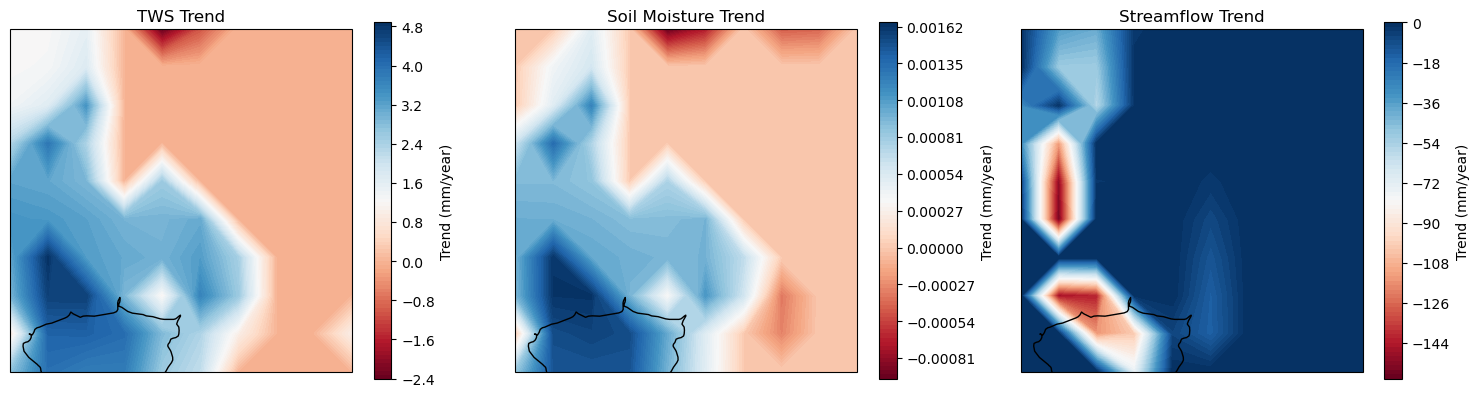

In [78]:

variables = ['TWS_tavg', 'SoilMoist_tavg', 'Streamflow_tavg_filled']
titles = ['TWS Trend', 'Soil Moisture Trend', 'Streamflow Trend']

# Define lon_zoom and lat_zoom based on full grid
lon_zoom = longitude_2D[10:20, 10:20]  # Ensure these are in correct geographic coordinates
lat_zoom = latitude_2D[5:15, 5:15]   # Use the same indices

subplot_zoom(trend_data_dict, variables, titles, lon_zoom, lat_zoom)

In [79]:
def check_min_max_trend(data, variable, trends, time, has_profiles=False):
    # Find the indices of the maximum and minimum trends
    if has_profiles:
        max_trend_indices = np.unravel_index(np.nanargmax(trends), trends.shape)  # 3D for SoilMoist_tavg
        min_trend_indices = np.unravel_index(np.nanargmin(trends), trends.shape)
    else:
        max_trend_indices = np.unravel_index(np.nanargmax(trends), trends.shape)  # 2D for TWS_tavg or Streamflow_tavg
        min_trend_indices = np.unravel_index(np.nanargmin(trends), trends.shape)

    print(f"Location with highest positive trend (increasing {variable}): {max_trend_indices}, Trend: {trends[max_trend_indices]:.6f} mm/year")
    print(f"Location with highest negative trend (decreasing {variable}): {min_trend_indices}, Trend: {trends[min_trend_indices]:.6f} mm/year")

    # Corresponding latitude and longitude
    max_trend_lat, max_trend_lon = latitude_2D[max_trend_indices[-2:]], longitude_2D[max_trend_indices[-2:]]
    min_trend_lat, min_trend_lon = latitude_2D[min_trend_indices[-2:]], longitude_2D[min_trend_indices[-2:]]

    print(f"Coordinates of max positive trend: (Lat: {max_trend_lat}, Lon: {max_trend_lon})")
    print(f"Coordinates of max negative trend: (Lat: {min_trend_lat}, Lon: {min_trend_lon})")

    # Extract the time series for the max and min trend locations
    if has_profiles:
        max_trend_ts = data[variable][:, max_trend_indices[0], max_trend_indices[1], max_trend_indices[2]].values
        min_trend_ts = data[variable][:, min_trend_indices[0], min_trend_indices[1], min_trend_indices[2]].values
    else:
        max_trend_ts = data[variable][:, max_trend_indices[0], max_trend_indices[1]].values
        min_trend_ts = data[variable][:, min_trend_indices[0], min_trend_indices[1]].values

    # Plot the time series for the max and min trend locations
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    ax[0].plot(time, max_trend_ts, label=f"Max Trend (Lat: {max_trend_lat}, Lon: {max_trend_lon})", color='green')
    ax[0].set_title(f"Time Series at Max Trend (Lat: {max_trend_lat}, Lon: {max_trend_lon})")
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel(f'{variable} (mm)')
    ax[0].legend()

    ax[1].plot(time, min_trend_ts, label=f"Min Trend (Lat: {min_trend_lat}, Lon: {min_trend_lon})", color='red')
    ax[1].set_title(f"Time Series at Min Trend (Lat: {min_trend_lat}, Lon: {min_trend_lon})")
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel(f'{variable} (mm)')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

    return max_trend_ts, min_trend_ts

Location with highest positive trend (increasing TWS_tavg): (7, 12), Trend: 0.071356 mm/year
Location with highest negative trend (decreasing TWS_tavg): (28, 24), Trend: -0.007618 mm/year
Coordinates of max positive trend: (Lat: 13.625, Lon: 100.375)
Coordinates of max negative trend: (Lat: 18.875, Lon: 103.375)


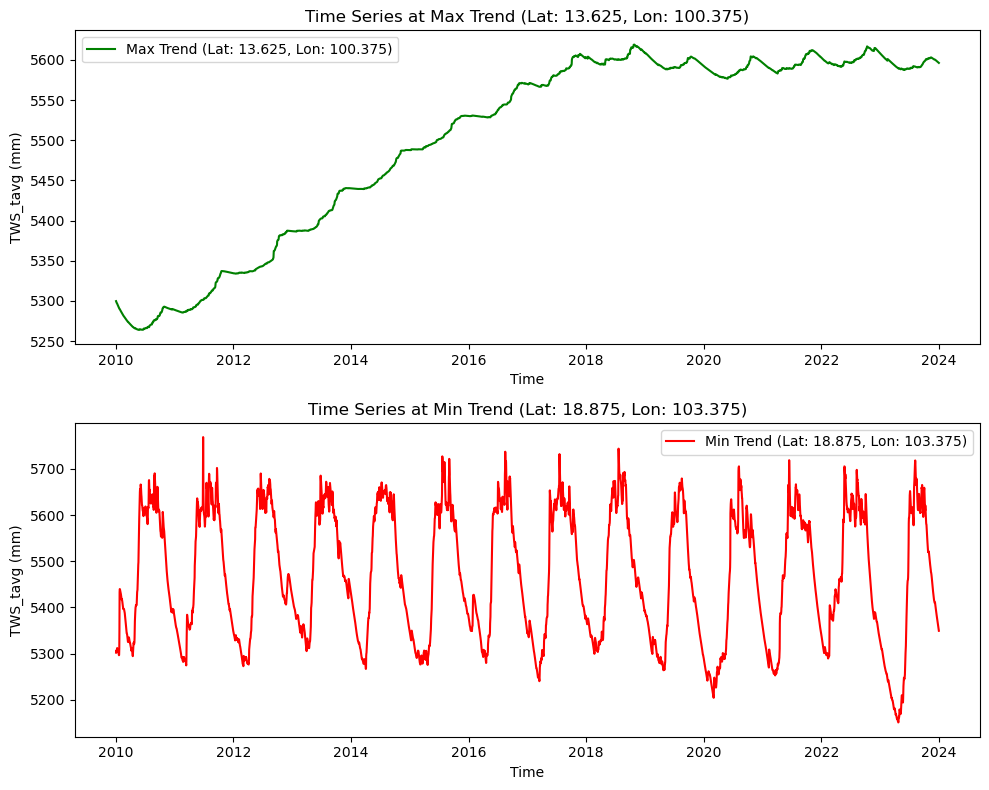

Location with highest positive trend (increasing SoilMoist_tavg): (3, 7, 12), Trend: 0.000035 mm/year
Location with highest negative trend (decreasing SoilMoist_tavg): (3, 28, 24), Trend: -0.000003 mm/year
Coordinates of max positive trend: (Lat: 13.625, Lon: 100.375)
Coordinates of max negative trend: (Lat: 18.875, Lon: 103.375)


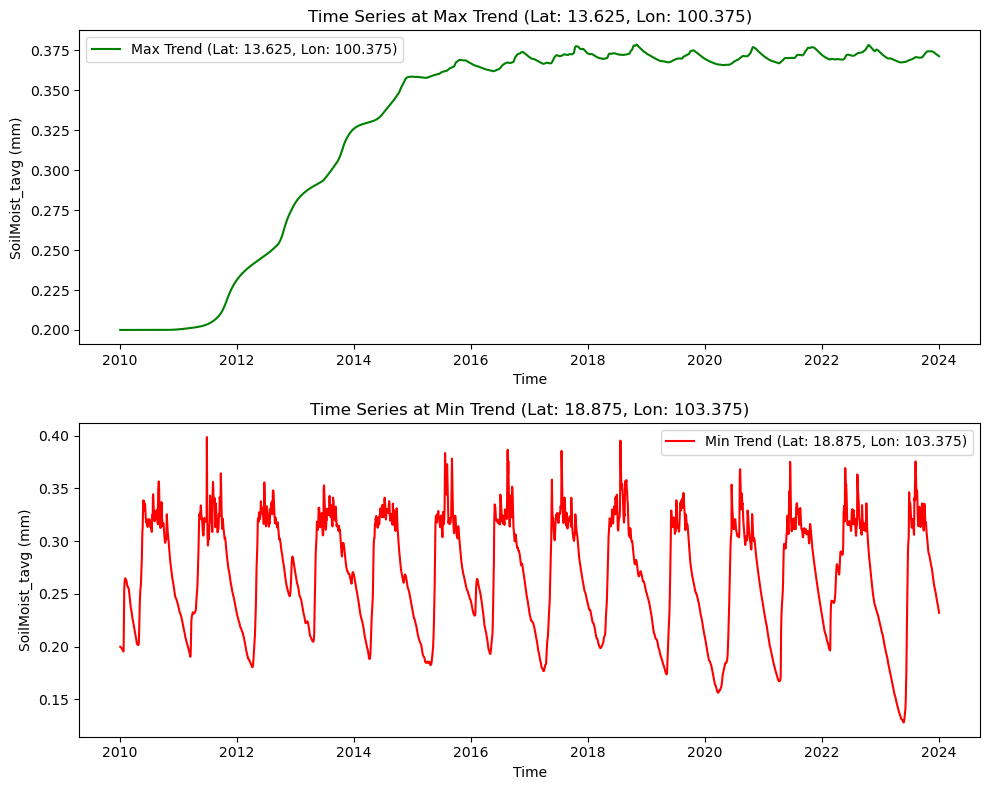

In [80]:
# Example usage for TWS
tws_max_trend_ts, tws_min_trend_ts = check_min_max_trend(ds_surface, 'TWS_tavg', 
                                                         trends_tws, time = ds_surface['time'].values)

# Example usage for SoilMoist_tavg (with profiles)
sm_max_trend_ts, sm_min_trend_ts = check_min_max_trend(ds_surface, 'SoilMoist_tavg', 
                                                       trends_soil_moisture, time = ds_surface['time'].values, has_profiles=True)

In [81]:
# Define significant change threshold
significant_change_threshold = np.percentile(trends_soil_moisture, 75)

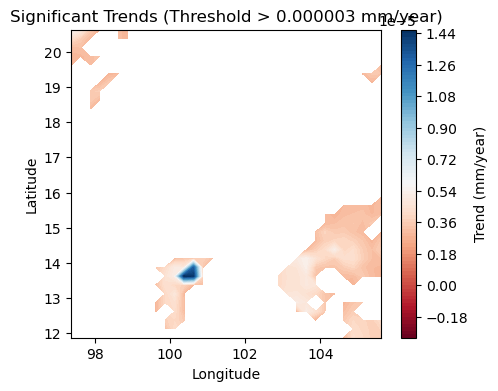

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def plot_significant_trends(trends, latitude_2D, longitude_2D, threshold):
    # Create a mask for significant trends
    significant_trends_mask = np.abs(trends) > threshold

    # Prepare the data to plot
    trend_to_plot = np.where(significant_trends_mask, trends, np.nan)  # Mask insignificant trends

    plt.figure(figsize=(5, 4))
    contour = plt.contourf(longitude_2D, latitude_2D, trend_to_plot, cmap='RdBu', levels=100)
    plt.colorbar(contour, label='Trend (mm/year)')
    plt.title(f'Significant Trends (Threshold > {threshold:.6f} mm/year)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Define significant change threshold
significant_change_threshold = np.percentile(trends_soil_moisture, 75)
plot_significant_trends(trends_soil_moisture[0, :, :], latitude_2D, longitude_2D, significant_change_threshold)  # For the first profile

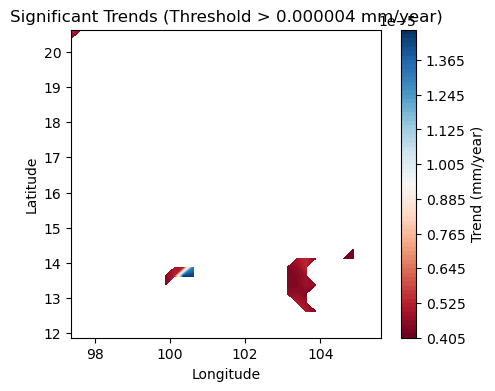

In [83]:
mean = np.mean(trends_soil_moisture)
std_dev = np.std(trends_soil_moisture)

# Define thresholds
threshold_one_sd = mean + std_dev
threshold_two_sd = mean + 2 * std_dev
plot_significant_trends(trends_soil_moisture[0, :, :], latitude_2D, longitude_2D, threshold_one_sd) 

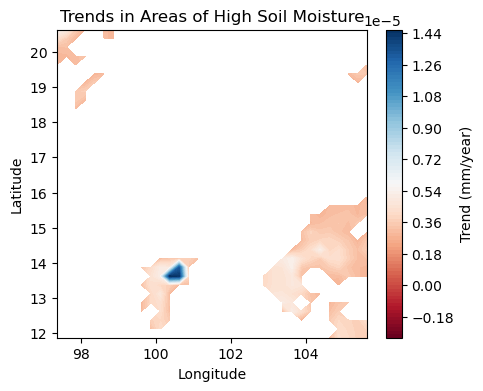

In [84]:
def plot_high_moisture_trends(trends, high_moisture_mask, latitude_2D, longitude_2D):
    # Prepare the trend data to plot only where high moisture is present
    trend_to_plot = np.where(high_moisture_mask, trends, np.nan)  # Mask insignificant trends

    plt.figure(figsize=(5, 4))
    contour = plt.contourf(longitude_2D, latitude_2D, trend_to_plot, cmap='RdBu', levels=100)
    plt.colorbar(contour, label='Trend (mm/year)')
    plt.title('Trends in Areas of High Soil Moisture')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
    
# Create mask for significant changes
significant_trends_mask = np.abs(trends_soil_moisture) > significant_change_threshold
# Example usage
plot_high_moisture_trends(trends_soil_moisture[0, :, :], significant_trends_mask[0, :, :], latitude_2D, longitude_2D)  # For the first profile

In [85]:
from scipy import stats

streamflow_data = ds_surface['Streamflow_tavg_filled']

# Define time slices for comparison
# Example: Compare data from the first half and the second half of the time series
first_half = streamflow_data.isel(time=slice(0, 2556))  
second_half = streamflow_data.isel(time=slice(2556, 5113))

# Convert to NumPy arrays for the t-test
first_half_values = first_half.values.flatten()  # Flatten to 1D
second_half_values = second_half.values.flatten()

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(first_half_values, second_half_values, equal_var=False)

# Output results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in streamflow.")
else:
    print("Fail to reject the null hypothesis: No significant difference in streamflow.")

T-statistic: 134.9535351616165
P-value: 0.0
Reject the null hypothesis: There is a significant difference in streamflow.


In [ ]:
#Based on the results of the t-test, we reject the null hypothesis, concluding that there is a significant difference in streamflow 
#between the two periods analyzed. The high t-statistic and the extremely low p-value indicate a strong statistical difference.

In [123]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries, significance_level=0.05):
    # Perform ADF test
    adf_result = adfuller(timeseries, autolag='AIC')
    
    # Extract results
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    critical_values = adf_result[4]
    
    # Display the ADF results
    print(f"ADF Statistic: {adf_statistic}")
    print(f"p-value: {p_value}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"   {key}: {value}")
    
    # Interpretation
    if p_value < significance_level:
        print(f"\nConclusion: The p-value ({p_value}) is less than the significance level ({significance_level}).")
        print("Reject the null hypothesis (H0). The series is stationary.")
    else:
        print(f"\nConclusion: The p-value ({p_value}) is greater than the significance level ({significance_level}).")
        print("Fail to reject the null hypothesis (H0). The series is non-stationary.")
    
    return adf_result

In [111]:
# Select a variable like TWS_tavg
tws = ds_surface['TWS_tavg']

# Average spatial dimensions or select a specific point (lat, lon)
tws_avg = tws.mean(dim=['north_south', 'east_west'])  # Averaging across space
tws_series = tws_avg.to_pandas()  # Convert to Pandas series for analysis

In [125]:
adf_test(tws_series, significance_level=0.05)

ADF Statistic: -6.955854304387079
p-value: 9.433460708503323e-10
Critical Values:
   1%: -3.43163740773434
   5%: -2.86210889702615
   10%: -2.5670728242296623

Conclusion: The p-value (9.433460708503323e-10) is less than the significance level (0.05).
Reject the null hypothesis (H0). The series is stationary.


(-6.955854304387079,
 9.433460708503323e-10,
 30,
 5082,
 {'1%': -3.43163740773434,
  '5%': -2.86210889702615,
  '10%': -2.5670728242296623},
 21694.46470222286)

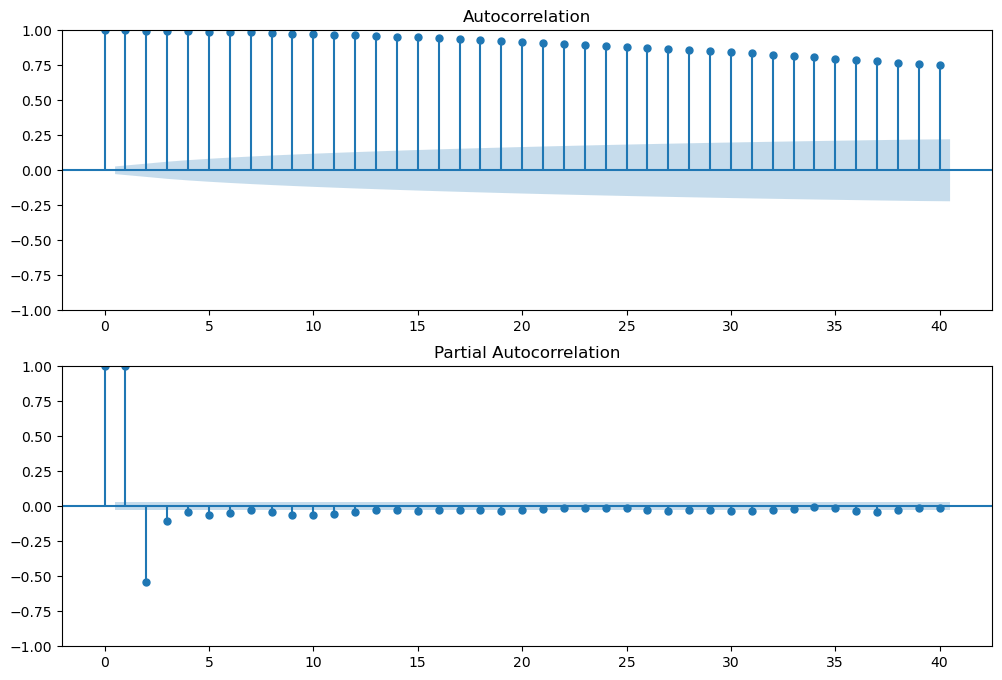

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(tws_series, lags=40, ax=ax[0])
plot_pacf(tws_series, lags=40, ax=ax[1])
plt.show()

In [127]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test on residuals
ljung_result = acorr_ljungbox(tws_series.dropna(), lags=[20], return_df=True)

print(ljung_result)

         lb_stat  lb_pvalue
20  95782.660514        0.0


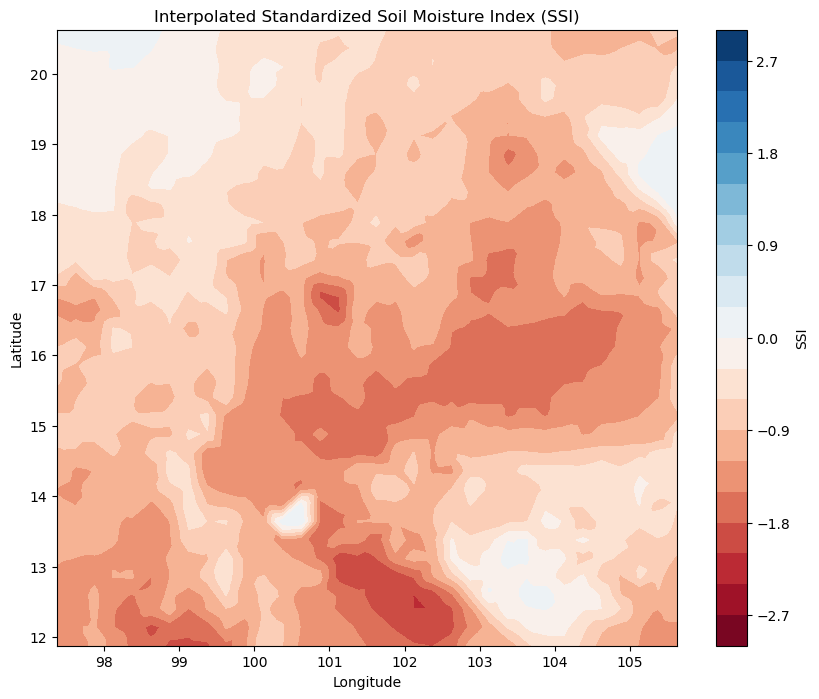

In [250]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load the dataset
ds = ds_surface

# Extract SoilMoist_tavg and time
soil_moist = ds['SoilMoist_tavg']  # Shape (time, SoilMoist_profiles, north_south, east_west)

# Select one soil layer (e.g., top layer: SoilMoist_profiles=0)
soil_moist_top = soil_moist[:, 0, :, :]  # Shape (time, north_south, east_west)

# Calculate the mean and std over time for each grid point
soil_moist_mean = soil_moist_top.mean(dim='time')
soil_moist_std = soil_moist_top.std(dim='time')

# Compute SSI (Standardized Soil Moisture Index)
ssi = (soil_moist_top - soil_moist_mean) / soil_moist_std

# Interpolation of SSI over the region using lat and lon
# Flatten the coordinates for interpolation
lat = ds['lat'].isel(time=0).values.flatten()  # Get latitudes, flattening to 1D
lon = ds['lon'].isel(time=0).values.flatten()  # Get longitudes, flattening to 1D
ssi_last_time = ssi.isel(time=-1).values.flatten()  # Take SSI at the last time step

# Create a regular grid for interpolation
grid_lat, grid_lon = np.mgrid[lat.min():lat.max():100j, lon.min():lon.max():100j]

# Interpolate SSI over the regular grid
ssi_interpolated = griddata((lat, lon), ssi_last_time, (grid_lat, grid_lon), method='linear')

# Plot interpolated SSI over the region
plt.figure(figsize=(10, 8))
plt.contourf(grid_lon, grid_lat, ssi_interpolated, cmap='RdBu', levels=np.linspace(-3, 3, 21))
plt.colorbar(label='SSI')
plt.title('Interpolated Standardized Soil Moisture Index (SSI)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [254]:
ssi.shape

(5113, 36, 34)

In [258]:
# Resample SSI to 3-month intervals (quarterly) for the last year
ssi_3_months = ssi.sel(time=slice("2023-01-01", "2023-12-31")).resample(time='3ME').mean()
print(ssi_3_months.shape)  # Should be (5, 36, 34)

(5, 36, 34)


In [296]:
# Function to plot SSI for each 3-month period with projection
def plot_ssi_projection(ssi_3_months, lat_2D, lon_2D):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.flatten()  # Flatten to easily iterate over axes

    for i, ax in enumerate(axes):
        if i >= len(ssi_3_months.time):
            ax.set_visible(False)  # Hide extra subplot axes if not enough periods
            continue

        # Select the current SSI for the quarter
        ssi_period = ssi_3_months.isel(time=i)
        ssi_period_values = ssi_period.values  # Get the values (shape: 36, 34)

        # Create a mask for valid (non-NaN) data points
        valid_mask = ~np.isnan(ssi_period_values)

        # Extract valid lat, lon, and SSI values using the 2D mask
        lat_valid = lat_2D[valid_mask]
        lon_valid = lon_2D[valid_mask]
        ssi_valid = ssi_period_values[valid_mask]

        # Check if valid data exists
        if lat_valid.size == 0 or lon_valid.size == 0 or ssi_valid.size == 0:
            print(f"No valid data available for period: {ssi_period.time.values}. Skipping...")
            continue

        # Create a regular grid for interpolation
        grid_lat, grid_lon = np.mgrid[lat_2D.min():lat_2D.max():100j, lon_2D.min():lon_2D.max():100j]

        # Interpolate SSI over the regular grid
        ssi_interpolated = griddata((lat_valid, lon_valid), ssi_valid, (grid_lat, grid_lon), method='linear')

        # Plotting with Cartopy
        ax.set_title(f'SSI for {ssi_period.time.dt.strftime("%Y-%m").values}')
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.LAND, edgecolor='black')

        # Contour plot
        contour = ax.contourf(grid_lon, grid_lat, ssi_interpolated, cmap='RdBu', levels=np.linspace(-3, 3, 21), transform=ccrs.PlateCarree())

        # Add a colorbar to the first plot (common colorbar)
        if i == 0:
            cbar = fig.colorbar(contour, ax=axes, orientation='horizontal', fraction=0.05, pad=0.1)
            cbar.set_label('SSI')

    # Show the plot after creating all subplots
    plt.show()

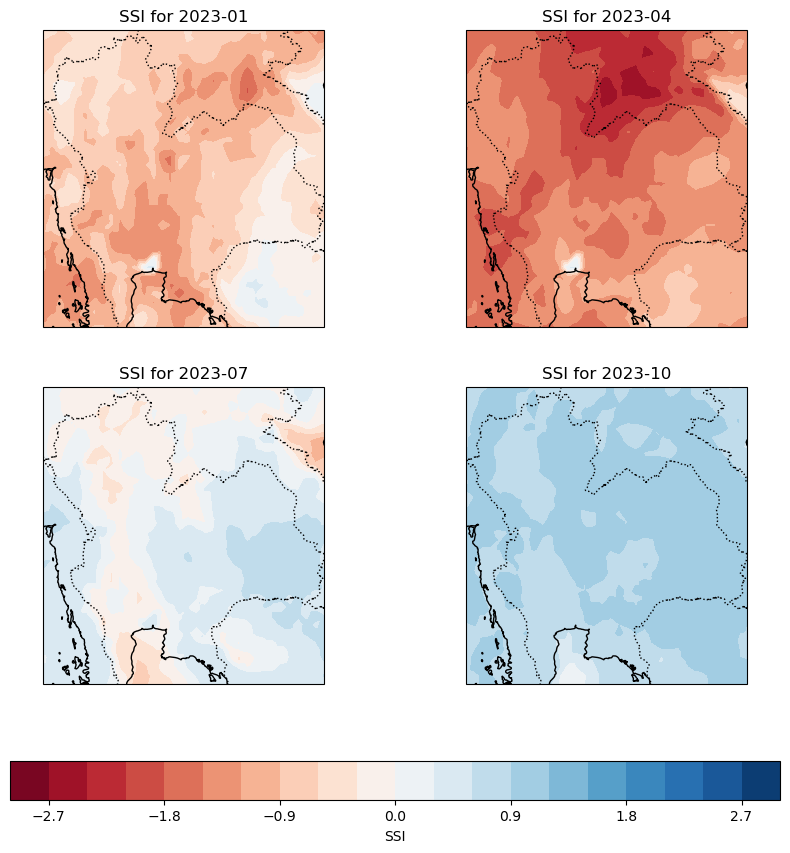

In [298]:
# Call the function to plot SSI for each 3-month period using Cartopy projection
plot_ssi_projection(ssi_3_months, latitude_2D, longitude_2D)

In [300]:
ssi_mean = ssi.mean().values
ssi_median = ssi.median().values
ssi_min = ssi.min().values
ssi_max = ssi.max().values
ssi_std = ssi.std().values

print(f'Mean SSI: {ssi_mean}')
print(f'Median SSI: {ssi_median}')
print(f'Min SSI: {ssi_min}')
print(f'Max SSI: {ssi_max}')
print(f'Standard Deviation SSI: {ssi_std}')

Mean SSI: -6.725430523601972e-08
Median SSI: 0.20551371574401855
Min SSI: -6.519871711730957
Max SSI: 3.968000888824463
Standard Deviation SSI: 0.9970042109489441


In [314]:
drought_events = ssi.where(ssi < -1).count(dim='time')
print(f'Number of Drought Events: {drought_events.values}')

Number of Drought Events: [[1075 1083 1096 ... 1135 1171 1192]
 [1232 1081 1080 ... 1152 1206 1238]
 [1243 1256 1058 ... 1132 1169 1094]
 ...
 [ 952  944  997 ...  554  624  663]
 [ 929  938  957 ...  521  586  666]
 [ 903  905  918 ...  549  657  725]]


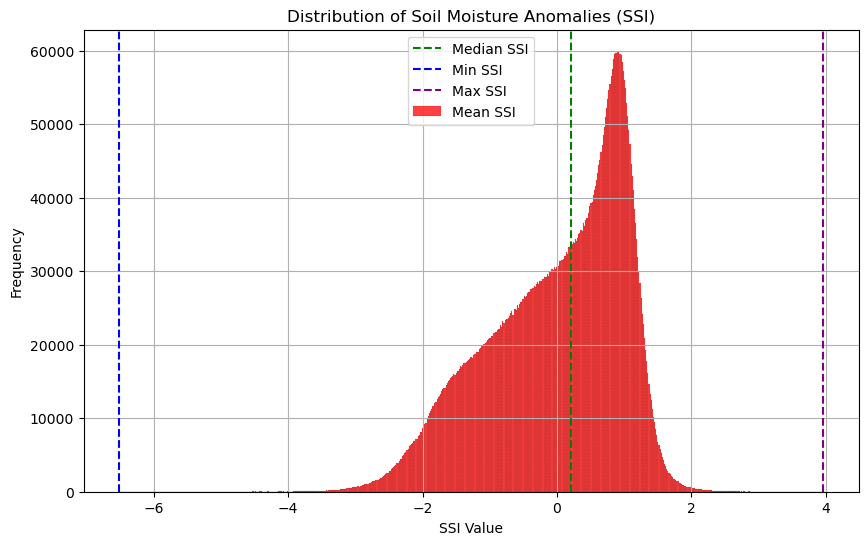

In [374]:
# Example: Visualizing the distribution of SSI values
ssi_flat= ssi.values.flatten()

plt.figure(figsize=(10, 6))
sns.histplot(ssi_flat, color='red', linestyle='--', label='Mean SSI')
plt.axvline(ssi_median, color='green', linestyle='--', label='Median SSI')
plt.axvline(ssi_min, color='blue', linestyle='--', label='Min SSI')
plt.axvline(ssi_max, color='purple', linestyle='--', label='Max SSI')
plt.title('Distribution of Soil Moisture Anomalies (SSI)')
plt.xlabel('SSI Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()